In [4]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import community
import pickle
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
import glob, os
import csv

# load the nullmodel data and structuralize

In [27]:
date="2018-01-31"
nulltype="EE"

In [58]:
def Make_dict_of_type(date,nulltype): #200*200=40000
    N_MODEL_dic={}
    Q_MODEL_dic={}
    I_MODEL_dic={}
    I_MQ_MODEL_dic={}
    for i in tqdm(range(200)):  # index for nullmodel
        N_dic={}
        Q_dic={}
        I_dic={}
        I_MQ_dic={}
        for j in range(200): # repeat times
            Address="C:/Users/wyw25/thesis/"+date+"_OUTPUT/"+nulltype+"/"+str(i)+"_nullindex/"+str(j)+"_repeat/data_structures_NQI_results"+date+".csv"
            df_output=pd.read_csv(Address)
            N_dic[j]=df_output['N'].values[0]
            Q_dic[j]=df_output['Q'].values[0]
            I_dic[j]=df_output['I'].values[0]
            I_MQ_dic[j]=df_output['I_MQ'].values[0]
        
        N_MODEL_dic[i]=N_dic
        Q_MODEL_dic[i]=Q_dic
        I_MODEL_dic[i]=I_dic
        I_MQ_MODEL_dic[i]=I_MQ_dic
        
    return  N_MODEL_dic,  Q_MODEL_dic, I_MODEL_dic, I_MQ_MODEL_dic
               

In [59]:
def Make_dict_of_date(date):
    EE={}
    FF={}
    PEEP={}
    PP={}
    
    N_MODEL_dic,  Q_MODEL_dic, I_MODEL_dic, I_MQ_MODEL_dic=Make_dict_of_type(date,"EE")
    EE['N']=N_MODEL_dic
    EE['Q']=Q_MODEL_dic
    EE['I']=I_MODEL_dic
    EE['I_MQ']=I_MQ_MODEL_dic
    
    N_MODEL_dic,  Q_MODEL_dic, I_MODEL_dic, I_MQ_MODEL_dic=Make_dict_of_type(date,"FF")
    FF['N']=N_MODEL_dic
    FF['Q']=Q_MODEL_dic
    FF['I']=I_MODEL_dic
    FF['I_MQ']=I_MQ_MODEL_dic
    
    N_MODEL_dic,  Q_MODEL_dic, I_MODEL_dic, I_MQ_MODEL_dic=Make_dict_of_type(date,"PEEP")
    PEEP['N']=N_MODEL_dic
    PEEP['I']=I_MODEL_dic
    PEEP['Q']=Q_MODEL_dic
    PEEP['I_MQ']=I_MQ_MODEL_dic
    
    N_MODEL_dic,  Q_MODEL_dic, I_MODEL_dic, I_MQ_MODEL_dic=Make_dict_of_type(date,"PP")
    PP['N']=N_MODEL_dic
    PP['Q']=Q_MODEL_dic
    PP['I']=I_MODEL_dic
    PP['I_MQ']=I_MQ_MODEL_dic
    
    
    return EE,FF,PEEP,PP
    
    

In [60]:
EE,FF,PEEP,PP=Make_dict_of_date("2018-01-31")

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [04:28<00:00,  1.34s/it]


# load the empirical data and structuralize

In [293]:
def Make_Empricial_data(date):
    N_dic={}
    Q_dic={}
    I_dic={}
    I_MQ_dic={}
    for i in range(200): # repeat times
        Address="C:/Users/wyw25/thesis/"+date+"/"+str(i)+"/data_structures_NQI_results"+date+".csv"
        df_output=pd.read_csv(Address)
        N_dic[i]=df_output['N'].values[0]
        Q_dic[i]=df_output['Q'].values[0]
        I_dic[i]=df_output['I'].values[0]
        I_MQ_dic[i]=df_output['I_MQ'].values[0]
            
    return  list(N_dic.values()),  list(Q_dic.values()), list(I_dic.values()), list(I_MQ_dic.values())

In [294]:
N_em,  Q_em, I_em, I_MQ_em=Make_Empricial_data("2018-01-31")

# Load data from server

In [310]:
datelist=['2018-01-12','2018-01-14','2018-01-15','2018-01-16','2018-01-17',
            '2018-01-18','2018-01-19','2018-01-20','2018-01-21','2018-01-22','2018-01-23','2018-01-24',
            '2018-01-25']

In [311]:
DATA={}
for date in datelist:
    with open("C:/Users/wyw25/thesis/to_local/"+date+"_stat.pkl", 'rb') as fp:
        parameters= pickle.load(fp)    
    DATA[date]=parameters

In [ ]:
def Date_Slice_data(date,D):
    EE=D[date]['EE']
    FF=D[date]['FF']
    PEEP=D[date]['PEEP']
    PP=D[date]['PP']
    
    return EE,FF,PEED,PP
    

# the functions for visualization

In [112]:
def Make_Gross_list(typedict):
    Gross_list=[]
    for variables in ['N','I','Q','I_MQ']: 
        numbers=[]
        for repeat in typedict[variables].keys():
            numbers=numbers+list(typedict[variables][repeat].values())
        Gross_list.append(numbers)   
            
    return Gross_list[0],Gross_list[1],Gross_list[2],Gross_list[3]
        

In [121]:
N_EE,I_EE,Q_EE,I_MQ_EE=Make_Gross_list(EE)
N_FF,I_FF,Q_FF,I_MQ_FF=Make_Gross_list(FF)
N_PEEP,I_PEEP,Q_PEEP,I_MQ_PEEP=Make_Gross_list(PEEP)
N_PP,I_PP,Q_PP,I_MQ_PP=Make_Gross_list(PP)

In [122]:
dataEE=[N_EE,I_EE,Q_EE,I_MQ_EE]
dataFF=[N_FF,I_FF,Q_FF,I_MQ_FF]
dataPEEP=[N_PEEP,I_PEEP,Q_PEEP,I_MQ_PEEP]
dataPP=[N_PP,I_PP,Q_PP,I_MQ_PP]

In [135]:
labels=['N','I','Q','I_MQ']
fs = 10

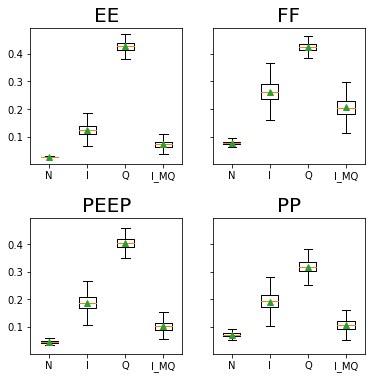

In [187]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), sharey=True)
axs[0, 0].boxplot(dataEE, labels=labels, showmeans=True,showfliers=False)
axs[0, 0].set_title('EE', fontsize=fs)

axs[0, 1].boxplot(dataFF, labels=labels, showmeans=True,showfliers=False)
axs[0, 1].set_title('FF', fontsize=fs)

axs[1, 0].boxplot(dataPEEP, labels=labels, showmeans=True,showfliers=False)
axs[1, 0].set_title('PEEP', fontsize=fs)

axs[1, 1].boxplot(dataPP, labels=labels, showmeans=True,showfliers=False)
axs[1, 1].set_title('PP', fontsize=fs)

#for ax in axs.flat:
#    ax.set_yscale('log')
#    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()

In [295]:
dataN=[N_EE,N_FF,N_PEEP,N_PP,N_em]
dataI=[I_EE,I_FF,I_PEEP,I_PP,I_em]
dataQ=[Q_EE,Q_FF,Q_PEEP,Q_PP,Q_em]
dataIMQ=[I_MQ_EE,I_MQ_FF,I_MQ_PEEP,I_MQ_PP,I_MQ_em]

labels=['EE','FF','PEEP','PP','EMPIRICAL']
fs = 10

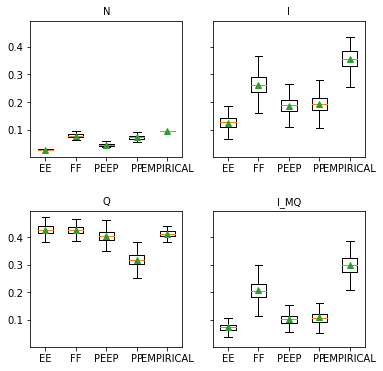

In [296]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), sharey=True)
axs[0, 0].boxplot(dataN, labels=labels, showmeans=True,showfliers=False)
axs[0, 0].set_title('N', fontsize=fs)

axs[0, 1].boxplot(dataI, labels=labels, showmeans=True,showfliers=False)
axs[0, 1].set_title('I', fontsize=fs)

axs[1, 0].boxplot(dataQ, labels=labels, showmeans=True,showfliers=False)
axs[1, 0].set_title('Q', fontsize=fs)

axs[1, 1].boxplot(dataIMQ, labels=labels, showmeans=True,showfliers=False)
axs[1, 1].set_title('I_MQ', fontsize=fs)

#for ax in axs.flat:
#    ax.set_yscale('log')
#    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()

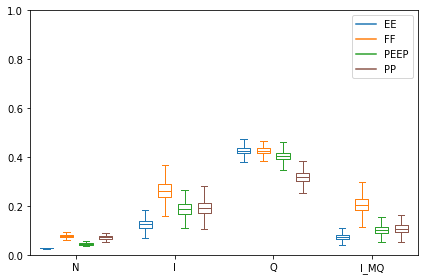

In [216]:
import matplotlib.pyplot as plt
import numpy as np

dataEE=[N_EE,I_EE,Q_EE,I_MQ_EE]
dataFF=[N_FF,I_FF,Q_FF,I_MQ_FF]
dataPEEP=[N_PEEP,I_PEEP,Q_PEEP,I_MQ_PEEP]
dataPP=[N_PP,I_PP,Q_PP,I_MQ_PP]

ticks=['N','I','Q','I_MQ']


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bp1 = plt.boxplot(dataEE, positions=np.array(range(len(dataEE)))*3.0-0.9,sym='',  widths=0.4)
bp2 = plt.boxplot(dataFF, positions=np.array(range(len(dataFF)))*3.0-0.3, sym='', widths=0.4)
bp3 = plt.boxplot(dataPEEP, positions=np.array(range(len(dataPEEP)))*3.0+0.3, sym='', widths=0.4)
bp4 = plt.boxplot(dataPP, positions=np.array(range(len(dataPP)))*3.0+0.9, sym='', widths=0.4)

set_box_color(bp1, 'tab:blue') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'tab:orange')
set_box_color(bp3, 'tab:green')
set_box_color(bp4, 'tab:brown')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:blue', label='EE')
plt.plot([], c='tab:orange', label='FF')
plt.plot([], c='tab:green', label='PEEP')
plt.plot([], c='tab:brown', label='PP')
plt.legend()

plt.xticks(range(0, len(ticks) * 3, 3), ticks)
#plt.xlim(-2, len(ticks)*3)
plt.ylim(0, 1)
plt.tight_layout()

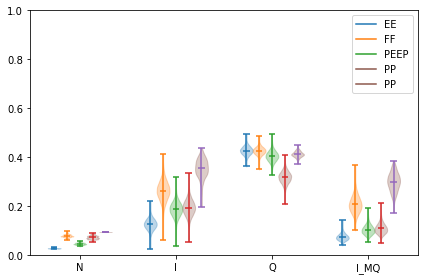

In [297]:
dataEE=[N_EE,I_EE,Q_EE,I_MQ_EE]
dataFF=[N_FF,I_FF,Q_FF,I_MQ_FF]
dataPEEP=[N_PEEP,I_PEEP,Q_PEEP,I_MQ_PEEP]
dataPP=[N_PP,I_PP,Q_PP,I_MQ_PP]
dataEMPIRICAL=[N_em,I_em,Q_em,I_MQ_em]

ticks=['N','I','Q','I_MQ']


def set_box_color(bp, color):
  #  plt.setp(bp['boxes'], color=color)
  #  plt.setp(bp['whiskers'], color=color)
   # plt.setp(bp['caps'], color=color)
   # plt.setp(bp['medians'], color=color)
    plt.setp(bp['bodies'], color=color)

plt.figure()

bp1 = plt.violinplot(dataEE, positions=np.array(range(len(dataEE)))*3.0-0.8,  widths=0.4,showmeans=True,)
bp2 = plt.violinplot(dataFF, positions=np.array(range(len(dataFF)))*3.0-0.4,  widths=0.4,showmeans=True,)
bp3 = plt.violinplot(dataPEEP, positions=np.array(range(len(dataPEEP)))*3.0, widths=0.4,showmeans=True,)
bp4 = plt.violinplot(dataPP, positions=np.array(range(len(dataPP)))*3.0+0.4,  widths=0.4,showmeans=True,)
bp5 = plt.violinplot(dataEMPIRICAL, positions=np.array(range(len(dataPP)))*3.0+0.8,  widths=0.4,showmeans=True,)

set_box_color(bp1, 'tab:blue') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'tab:orange')
set_box_color(bp3, 'tab:green')
set_box_color(bp4, 'tab:brown')
set_box_color(bp5, 'tab:brown')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:blue', label='EE')
plt.plot([], c='tab:orange', label='FF')
plt.plot([], c='tab:green', label='PEEP')
plt.plot([], c='tab:brown', label='PP')
plt.plot([], c='tab:brown', label='PP')
plt.legend()

plt.xticks(range(0, len(ticks) * 3, 3), ticks)
#plt.xlim(-2, len(ticks)*3)
plt.ylim(0, 1)
plt.tight_layout()

In [302]:
def Draw_means(data,position,Color,Label):
    sample_means = np.mean(data, axis=1)

    # Create a violin plot with the roles of x and y switched
    bp=plt.violinplot(data, showmeans=True, showextrema=False,positions=position,  widths=0.4)

    # Add a vertical line or point for the mean of each sample
    for i, mean_val in enumerate(sample_means):
        plt.plot(position[i], mean_val, 'k.')  # 'ro' stands for red color, round marker
        plt.text(position[i], mean_val+0.1,  "{:.2f}".format(mean_val), color='black', ha='center',fontsize=7)
        
    set_box_color(bp, Color)     
    
    return plt

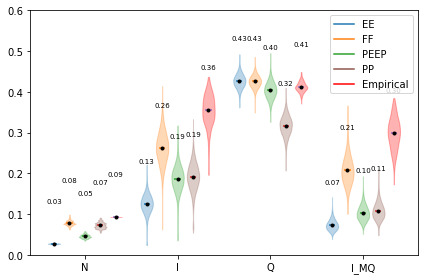

In [309]:

dataEE=[N_EE,I_EE,Q_EE,I_MQ_EE]
dataFF=[N_FF,I_FF,Q_FF,I_MQ_FF]
dataPEEP=[N_PEEP,I_PEEP,Q_PEEP,I_MQ_PEEP]
dataPP=[N_PP,I_PP,Q_PP,I_MQ_PP]
dataEMPIRICAL=[N_em,I_em,Q_em,I_MQ_em]

ticks=['N','I','Q','I_MQ']


def set_box_color(bp, color):
      #  plt.setp(bp['boxes'], color=color)
      #  plt.setp(bp['whiskers'], color=color)
       # plt.setp(bp['caps'], color=color)
       # plt.setp(bp['medians'], color=color)
    plt.setp(bp['bodies'], color=color)

def MAKE_violin(dataEE,dataFF,dataPEEP,dataPP,dataEMPIRICAL):    
    plt.figure()

    bp1 = Draw_means(dataEE,np.array(range(len(dataEE)))*3.0-1.0,'tab:blue','EE')
    bp2 = Draw_means(dataFF,np.array(range(len(dataFF)))*3.0-0.5,'tab:orange','FF')
    bp3 = Draw_means(dataPEEP,np.array(range(len(dataPEEP)))*3.0,'tab:green','PEEP')
    bp4 = Draw_means(dataPP,np.array(range(len(dataPP)))*3.0+0.5,'tab:brown','PP')
    bp5 = Draw_means(dataEMPIRICAL,np.array(range(len(dataPP)))*3.0+1.0,'red','Empirical')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='tab:blue', label='EE')
    plt.plot([], c='tab:orange', label='FF')
    plt.plot([], c='tab:green', label='PEEP')
    plt.plot([], c='tab:brown', label='PP')
    plt.plot([], c='red', label='Empirical')
    plt.legend()

    plt.xticks(range(0, len(ticks) * 3, 3), ticks)
    #plt.xlim(-2, len(ticks)*3)
    plt.ylim(0, 0.1)
    plt.tight_layout()

(array([ 7., 22., 43., 43., 34., 27., 16.,  3.,  4.,  1.]),
 array([0.08831474, 0.09701257, 0.1057104 , 0.11440823, 0.12310606,
        0.1318039 , 0.14050173, 0.14919956, 0.15789739, 0.16659522,
        0.17529305]),
 <BarContainer object of 10 artists>)

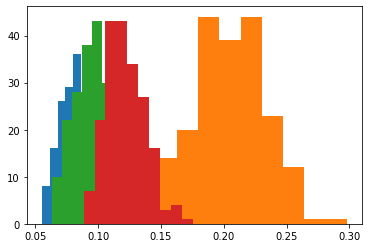

In [82]:
plt.hist(EE['I_MQ'][100].values())
plt.hist(FF['I_MQ'][100].values())
plt.hist(PEEP['I_MQ'][100].values())
plt.hist(PP['I_MQ'][100].values())


In [ ]:
# THE GRAPH BY TIME

In [ ]:
# NODF
# SAME OF ALL RANDOM
def Stat_NODF():
    
    
    
    
    


In [ ]:
# Modularity
def Stat_Modularity():
    
    
    
    



In [ ]:
# Inblock Nestedness
def Stat_IBN():
    
    
    



In [ ]:
# Inblock Nestedness under Max Modularity
def Stat_IBN_MAX_Modularity():






In [ ]:
# 200 for each null models 

In [ ]:
# repeat 200 for each